# MNIST GAN 0.9b

Change of architecture to more closely follow a known working architecture
(see https://www.tensorflow.org/tutorials/generative/dcgan)

See model_summary in Testing_Runs directory

Further minor changes:
  - Re-test of MIXED mini-batches (for discriminator) with TTUR

In [1]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session
from tensorflow.keras.datasets import mnist

import pickle

In [2]:
# mnist_ex.preprocess_real(save_only=True)
# real_train, real_test = pickle.load(open("mnist_train_tuple.p", "rb"))
# real_train.shape
(real_train, _), _ = mnist.load_data()
real_train = (np.expand_dims(real_train, axis=-1)/127.5 - 1.).astype("float32")
real_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28, 1)

In [3]:
reload(gan)

<module 'gan' from '/content/gan.py'>

In [4]:
clear_session()
model = gan.GAN(x_shape=real_train.shape[1:], kernal_size=5, verbose=True, lr=(1e-4, 2e-4))

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
batch_normalization_2 (Batch (None, 6272)              25088     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         409600    
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 128)         51

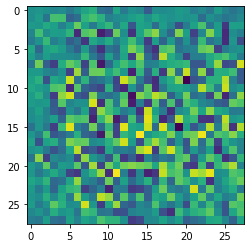

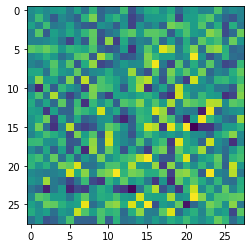

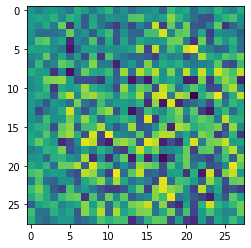

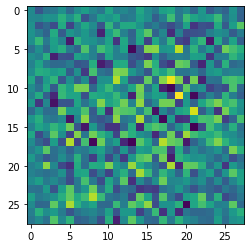

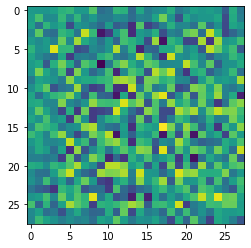

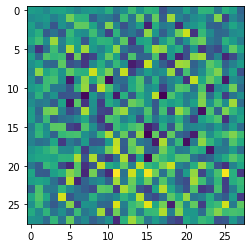

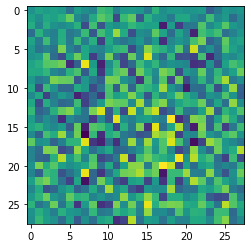

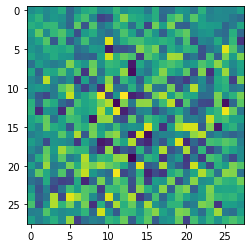

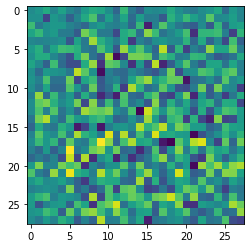

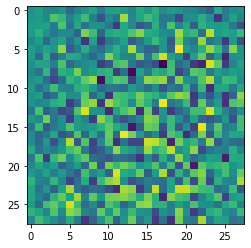

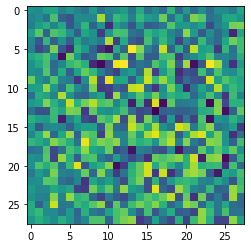

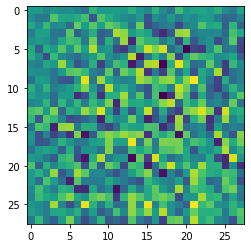

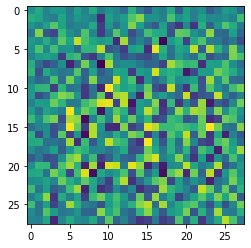

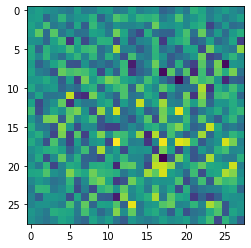

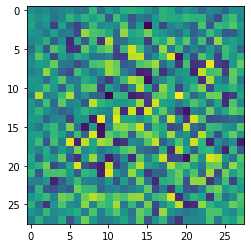

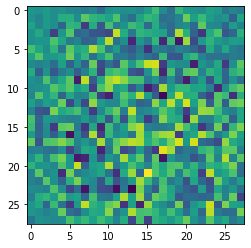

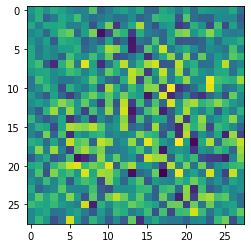

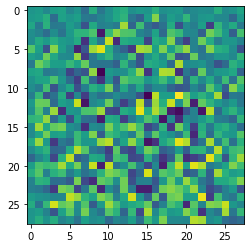

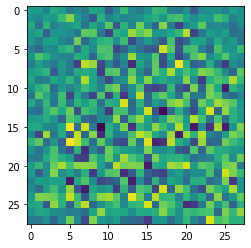

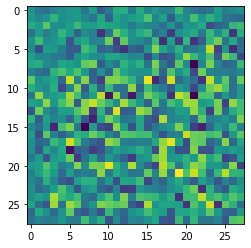

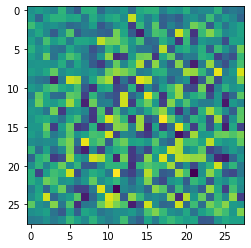

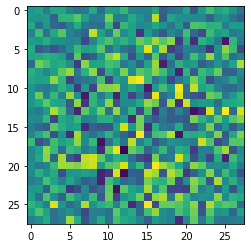

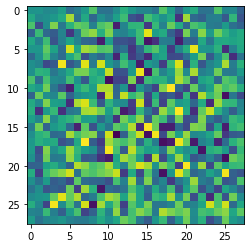

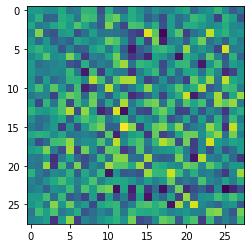

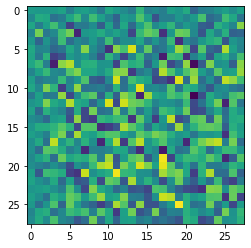

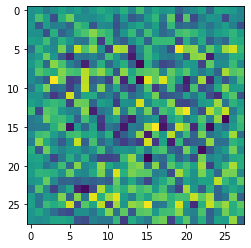

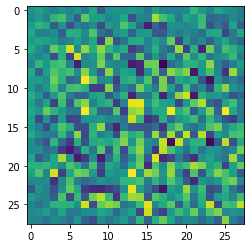

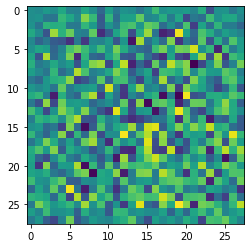

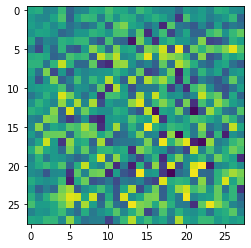

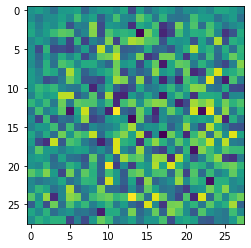

In [5]:
model.train(real_train, num_epochs=30, batch_size=60)